# Here is several plots of chapter 1 & 2 of my thesis.

**0. eqn. 1.18, Fraunhofer pattern**

Text(0.5, 0, 'Φ$_J$/Φ$_0$')

Text(0, 0.5, 'I$_c$/I$_0$')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

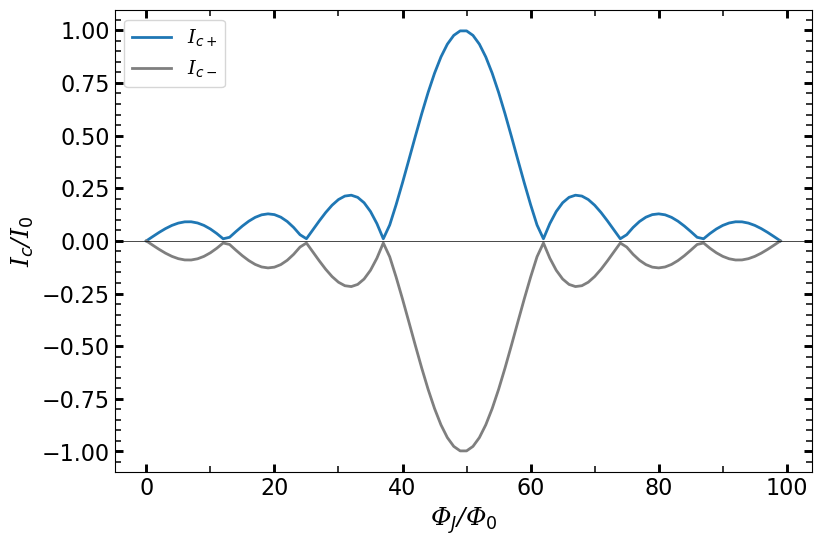

In [6]:
#Simple Fraunhofer pattern, namely eq. 1.18 of my thesis.

#%matplotlib notebook
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.font_manager as fm




def I(x):
    return abs(np.sinc(x))
x = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))#
plt.plot(I(x),linewidth=2.0, color='tab:blue',label="I$_{c+}$")
plt.plot(-I(x),linewidth=2.0, color='tab:gray',label="I$_{c-}$")
font = fm.FontProperties(family='serif', style='italic', size=14)



plt.xlabel("\u03A6$_J$/\u03A6$_0$", fontname="serif",  style='italic', fontsize=18) #fontname="Comic Sans MS"
plt.ylabel("I$_c$/I$_0$", fontname="serif", style='italic', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc="upper left",prop=font)
#plt.axvline(x=50, color='black', lw=0.5)
plt.axhline(color='black' ,lw=0.5)
#plt.axvline(color='black', lw=0.5) #linestyle='dashed',
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(5))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
ax.tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
ax.tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
ax.tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
ax.xaxis.set_ticks_position('default')
ax.yaxis.set_ticks_position('default')
ax.tick_params(bottom=True, top=True, left=True, right=True)
#ax.tick_params(axis='y',pad=20, left="off",labelleft="off")







**1. Critical current for in-line geometry of Josephson junction eqn. 2.3**


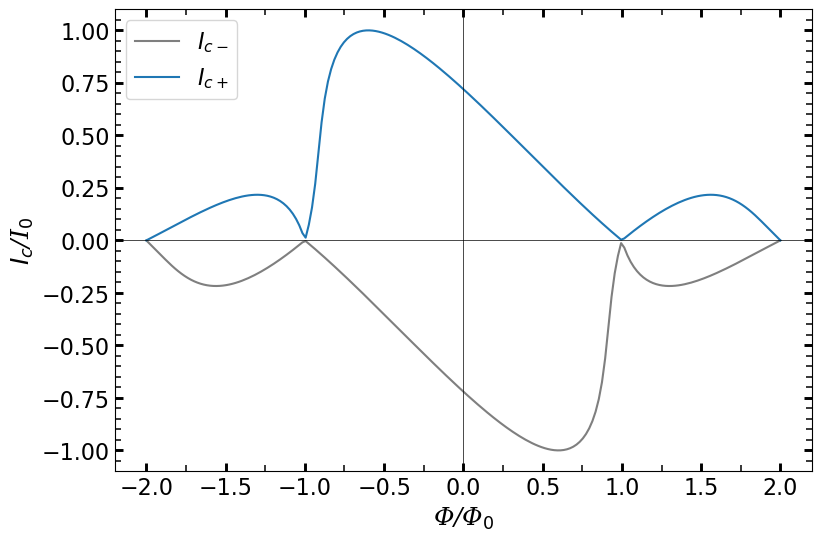

In [2]:
#Numerical solving of critical current for in-line geometry of Josephson junction namely eq. 5.1.5 of Barone 1982
#and/or eq. 2.3 of my thesis. This is done by bisection method

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from scipy.integrate import odeint
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


fig, ax = plt.subplots(1, 1, figsize=(9, 6))
def f(A, B, phi_m):
    if (B + phi_m*A==0):
        return 1-A
    else: 
        return np.sin(np.pi*(B + phi_m* A))/(np.pi*(B + phi_m*A)) - A
# Prints root of func(x)
# with error of EPSILON
def findcurrent(a, b,  B, phi_m, E=1e-10):
    n=0
    if (f(a, B, phi_m) * f(b,  B, phi_m) >= 0):
        print("You have not assumed right a and b\n")
        print("f(a)=","%.9f"%f(a, B, phi_m))
        print("f(b)=","%.9f"%f(b, B, phi_m))
        return
    c = b  
    while (abs(b-a) >= E) and n <= 10000:   
        n += 1
        # Find middle point
        c = (a+b)/2
        # Check if middle point is root
        if (f(c,  B, phi_m) == 0.0):
            break   
        # Decide the side to repeat the steps
        if (f(c,  B, phi_m)*f(a,  B, phi_m) < 0):
            b = c
        else:
            a = c
    #print("Required precision: ", E)         
    #print("The value of root is : ","%.9f"%c)
    #print("No. of iterations = ", n);
    return (a+b)/2
    
     
# Driver code
# Initial values assumed
phi_m=0.6
a =-1
b =1
#findcurrent(a, B,  -2, phi_m, E=1e-7)
#findcurrent(a, b, B, phi_m, E=1e-7)
#findcurrent(a, b, B, phi_m, E=1e-7)
N=200
Js = np.linspace(-2,2,N)
Is = np.zeros(N)
for i, B in enumerate(Js):
    Is[i] = findcurrent(a,b,  B, phi_m, E=1e-10)
#print(B, Is[i])
#print(Is)   


plt.plot(-Js, -np.abs(Is), color='tab:gray',label="$I_{c-}$")
plt.plot(Js, np.abs(Is), color='tab:blue',label="$I_{c+}$")

plt.xlabel("\u03A6/\u03A6$_0$", fontname="serif",  style='italic', fontsize=18) #fontname="Comic Sans MS"
plt.ylabel("$I_c$/I$_0$", fontname="serif", style='italic', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="upper left",fontsize=16)
#plt.axvline(x=50, color='black', lw=0.5)
plt.axhline(color='black' ,lw=0.5)
plt.axvline(color='black', lw=0.5) #linestyle='dashed',
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(5))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
ax.tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
ax.tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
ax.tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
ax.xaxis.set_ticks_position('default')
ax.yaxis.set_ticks_position('default')
ax.tick_params(bottom=True, top=True, left=True, right=True)
#ax.tick_params(axis='y',pad=20, left="off",labelleft="off")



**2. Asymmetry parameter eqn. 2.1, $\mathscr{A}$ depends on $f$ for different fixed values of $f^M$**

Text(0.5, 0, 'f')

Text(0, 0.5, '$\\mathscr{A}$')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

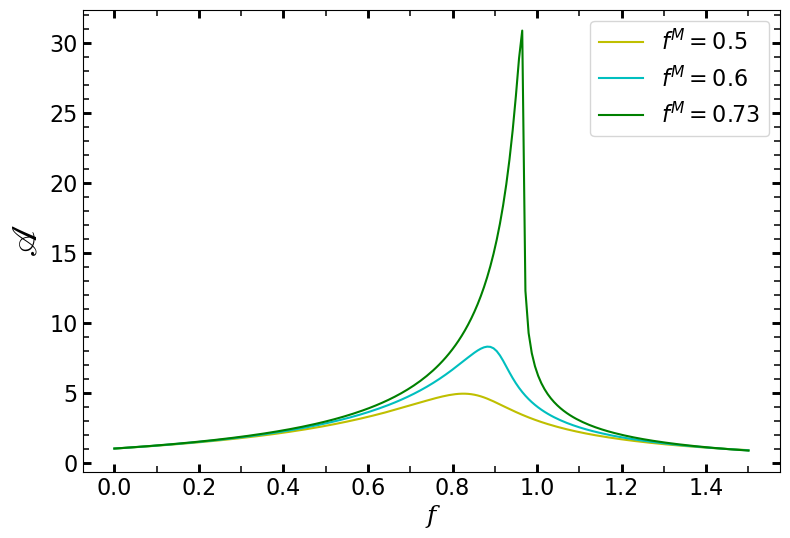

In [7]:
#Asymmetry parameter (eq. 2.1 of my thesis) $\mathscr{A}$ depends on $f$ for different fixed values of $f^M$
fig, ax = plt.subplots(1, 1, figsize=(9, 6))#
phi_m=0.5
Bs = np.linspace(-1.5,0,N)
As = np.zeros(N)
for i, B in enumerate(Bs):
    Ip = findcurrent(a,b,  B, phi_m, E=1e-10)
    In = findcurrent(a,b, -B, phi_m, E=1e-10)
    As[i] = np.abs(Ip/In)
plt.plot(-1*Bs, As, c='y', label='$f^M = 0.5$')


phi_m=0.6
Bs = np.linspace(-1.5,0,N)
As = np.zeros(N)
for i, B in enumerate(Bs):
    Ip = findcurrent(a,b,  B, phi_m, E=1e-10)
    In = findcurrent(a,b, -B, phi_m, E=1e-10)
    As[i] = np.abs(Ip/In)
plt.plot(-1*Bs, As, c='c', label='$f^M = 0.6$')

phi_m=0.73
Bs = np.linspace(-1.5,0,N)
As = np.zeros(N)
for i, B in enumerate(Bs):
    Ip = findcurrent(a,b,  B, phi_m, E=1e-10)
    In = findcurrent(a,b, -B, phi_m, E=1e-10)
    As[i] = np.abs(Ip/In)
plt.plot(-1*Bs, As, c='g', label='$f^M = 0.73$')


plt.xlabel("f", fontname="serif",  style='italic', fontsize=18) #fontname="Comic Sans MS"
plt.ylabel("$\mathscr{A}$", fontname="serif", style='italic', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="upper right",fontsize=16)
#plt.axvline(x=50, color='black', lw=0.5)
#plt.axhline(color='black' ,lw=0.5)
#plt.axvline(color='black', lw=0.5) #linestyle='dashed',
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(5))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
ax.tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
ax.tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
ax.tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
ax.xaxis.set_ticks_position('default')
ax.yaxis.set_ticks_position('default')
ax.tick_params(bottom=True, top=True, left=True, right=True)
#ax.tick_params(axis='y',pad=20, left="off",labelleft="off")



**3. Dependencies of the maximum $\mathscr{A}(f_{\mathrm{opt}})$ to the $f^M$ at the optimum value of $f$**

Text(0.5, 0, 'f$^M$')

Text(0, 0.5, '$\\mathscr{A}$')

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


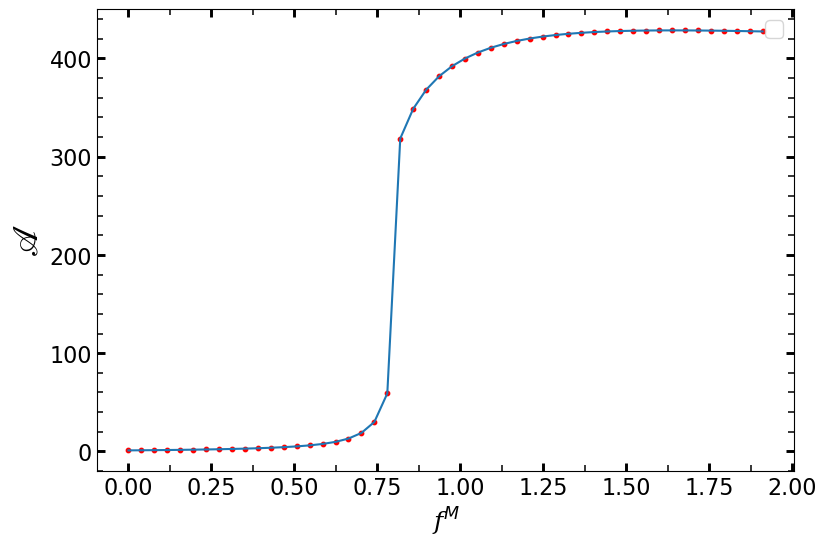

In [6]:
#Dependencies of the maximum $\mathscr{A}(f_{\mathrm{opt}})$ to the $f^M \in ( \,0, 1.9]\,$ at the optimum value of $f$

fig, ax = plt.subplots(1, 1, figsize=(9, 6))#
phi_m_list = np.linspace(0,1.91,50)
As_max_list = []

for phi_m in phi_m_list:
    a =-1
    b =1
    #findcurrent(a, B,  -2, phi_m, E=1e-7)
    #findcurrent(a, b, B, phi_m, E=1e-7)
    #findcurrent(a, b, B, phi_m, E=1e-7)
    N=200
    Bs = np.linspace(-2,2,N)
    As = np.zeros(N)
    for i, B in enumerate(Bs):
        Ip = findcurrent(a,b,  B, phi_m, E=1e-10)
        In = findcurrent(a,b, -B, phi_m, E=1e-10)
        As[i] = np.abs(Ip/In)
    Max = np.argmax(As)
    As_max_list.append(As[Max])
    
    
plt.plot(phi_m_list, As_max_list)
plt.scatter(phi_m_list, As_max_list, s=10, c='red')    
    
plt.xlabel("f$^M$", fontname="serif",  style='italic', fontsize=18) #fontname="Comic Sans MS"
plt.ylabel("$\mathscr{A}$", fontname="serif", style='italic', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="upper right",fontsize=16)
#plt.axvline(x=50, color='black', lw=0.5)
#plt.axhline(color='black' ,lw=0.5)
#plt.axvline(color='black', lw=0.5) #linestyle='dashed',
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(5))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
ax.tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
ax.tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
ax.tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
ax.xaxis.set_ticks_position('default')
ax.yaxis.set_ticks_position('default')
ax.tick_params(bottom=True, top=True, left=True, right=True)
#ax.tick_params(axis='y',pad=20, left="off",labelleft="off")

    



**4. Critical current for In-line geometry of Josephson junction for several values of $f^M$, eqn. 2.3**



Text(0.5, 0, 'f')

Text(0, 0.5, 'I$_c$/I$_0$')

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

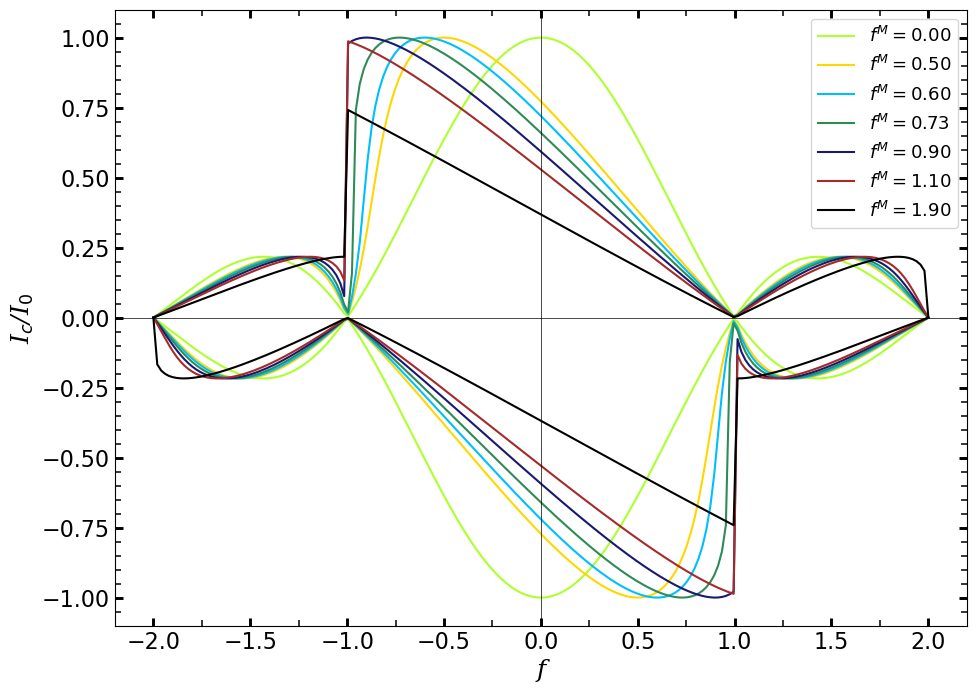

In [4]:
#Numerical solving of critical current for in-line geometry of Josephson junction namely eq. 2.3 of my thesis.
#for several values of $f^M$. This is done by bisection method
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from scipy.integrate import odeint

def f(A, B, phi_m):
    if (B + phi_m*A == 0):
        return 1 - A
    else:
        return np.sin(np.pi*(B + phi_m*A))/(np.pi*(B + phi_m*A)) - A

def findcurrent(a, b, B, phi_m, E=1e-10):
    if (f(a, B, phi_m) * f(b, B, phi_m) >= 0):
        print("You have not assumed right a and b\n")
        print("f(a) = {:.9f}".format(f(a, B, phi_m)))
        print("f(b) = {:.9f}".format(f(b, B, phi_m)))
        return

    c = b
    while (abs(b - a) >= E):
        c = (a + b) / 2
        if (f(c, B, phi_m) == 0.0):
            break
        if (f(c, B, phi_m) * f(a, B, phi_m) < 0):
            b = c
        else:
            a = c
    return (a + b) / 2

# Initial values assumed
phi_ms = [0, 0.5, 0.6, 0.73, 0.9, 1.1, 1.9]
a = -1
b = 1
N = 200
Js = np.linspace(-2, 2, N)

fig, ax = plt.subplots(1, 1, figsize=(11, 8))
plt.rcParams['figure.figsize'] = [9, 6]

colors = ['GreenYellow', 'gold', 'deepskyblue', 'seagreen', 'MidnightBlue', 'Brown', 'black']

for phi_m, color in zip(phi_ms, colors):
    Is = np.zeros(N)
    for i, B in enumerate(Js):
        Is[i] = findcurrent(a, b, B, phi_m, E=1e-10)
    plt.plot(-Js, -np.abs(Is), color=color, label="$f^M = {:.2f}$".format(phi_m))
    plt.plot(Js, np.abs(Is), color=color)

plt.legend(loc="upper right", fontsize=13)
plt.xlabel("f", fontname="serif", style='italic', fontsize=18)
plt.ylabel("I$_c$/I$_0$", fontname="serif", style='italic', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(5))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.tick_params(axis='x', which='minor', length=4, width=1.1, direction='in')
ax.tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
ax.tick_params(axis='y', which='minor', length=4, width=1.1, direction='in')
ax.tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
ax.xaxis.set_ticks_position('default')
ax.yaxis.set_ticks_position('default')
ax.tick_params(bottom=True, top=True, left=True, right=True)

plt.show()

